<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [6]:
x = df['highway-mpg']
y = df['price']

In [7]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


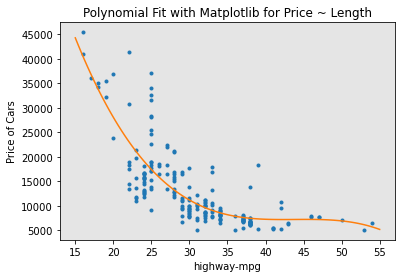

In [8]:
PlotPolly(p, x, y, 'highway-mpg')

In [9]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


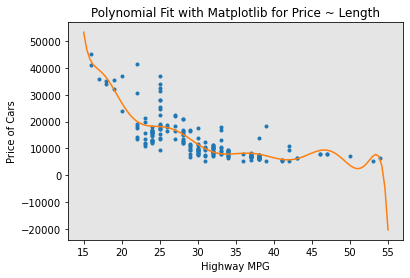

In [10]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<H1> Multivariate Ploynomial Functions

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [21]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2: 


In [22]:
pr=PolynomialFeatures(degree=2)

In [23]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features 


In [24]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features


In [25]:
Z_pr.shape

(201, 15)

<h2> Pipelines

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [30]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor 


In [31]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can normalize the data,  perform a transform and fit the model simultaneously. 


In [32]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously


In [34]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [38]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe_2=Pipeline(Input)

pipe_2.fit(Z,y)

ypipe=pipe_2.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])